# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بازشناسی چهره با روش یادگیری عمیق در Opencv</div>

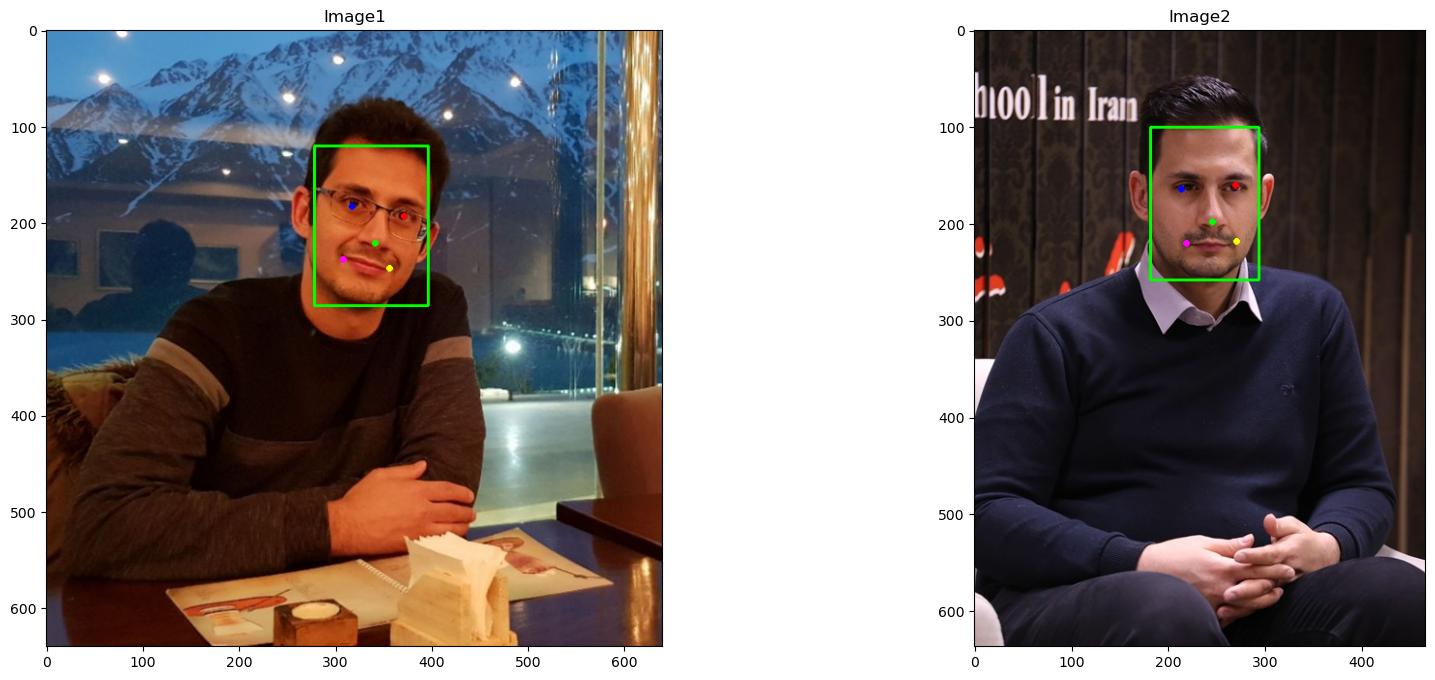

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

        

def visualize(input, faces, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(input, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(input, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(input, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(input, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(input, (coords[12], coords[13]), 2, (0, 255, 255), thickness)


detector = cv2.FaceDetectorYN.create(
    "model/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.8,
    0.3,
    5000
)

image1 = cv2.imread("face_img/akhavan.jpg")
img1 = image1.copy()
img1Width = int(img1.shape[1])
img1Height = int(img1.shape[0])

detector.setInputSize((img1Width, img1Height))
faces1 = detector.detect(img1)
visualize(img1, faces1)

image2 = cv2.imread("face_img/akhavan2.jpg")
img2 = image2.copy()


detector.setInputSize((img2.shape[1], img2.shape[0]))
faces2 = detector.detect(img2)
visualize(img2, faces2)

plt.figure(figsize=[20,8])
plt.subplot(1,2,1);plt.imshow(img1[...,::-1]);plt.title("Image1");
plt.subplot(1,2,2);plt.imshow(img2[...,::-1]);plt.title("Image2");


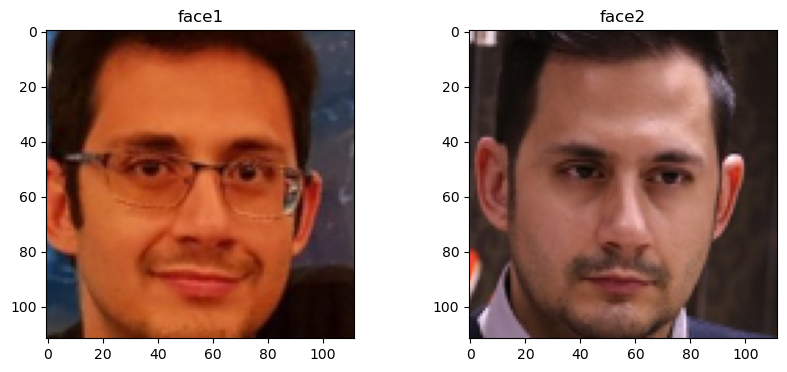

In [27]:
recognizer = cv2.FaceRecognizerSF.create(
"face_recognition_sface_2021dec.onnx","")
#download model from https://github.com/opencv/opencv_zoo/tree/main/models/face_recognition_sface

face1_align = recognizer.alignCrop(image1, faces1[1][0])
face2_align = recognizer.alignCrop(image2, faces2[1][0])

plt.figure(figsize=[10,4])
plt.subplot(1,2,1);plt.imshow(face1_align[...,::-1]);plt.title("face1");
plt.subplot(1,2,2);plt.imshow(face2_align[...,::-1]);plt.title("face2");


In [29]:
# Extract features
face1_feature = recognizer.feature(face1_align)
face2_feature = recognizer.feature(face2_align)

print(face1_feature.shape)
print(face2_feature.shape)

(1, 128)
(1, 128)


In [31]:
l2_similarity_threshold = 1.128

l2_score = recognizer.match(face1_feature, face2_feature, cv2.FaceRecognizerSF_FR_NORM_L2)

msg = 'different identities'
if l2_score <= l2_similarity_threshold:
    msg = 'the same identity'
print('They have {}. NormL2 Distance: {}, threshold: {} (lower value means higher similarity, min 0.0).'.format(msg, l2_score, l2_similarity_threshold))


They have the same identity. NormL2 Distance: 0.7319958325395693, threshold: 1.128 (lower value means higher similarity, min 0.0).


In [33]:
cosine_similarity_threshold = 0.363

cosine_score = recognizer.match(face1_feature, face2_feature, cv2.FaceRecognizerSF_FR_COSINE)

msg = 'different identities'
if cosine_score >= cosine_similarity_threshold:
    msg = 'the same identity'
print('They have {}. Cosine Similarity: {}, threshold: {} (higher value means higher similarity, max 1.0).'.format(msg, cosine_score, cosine_similarity_threshold))


They have the same identity. Cosine Similarity: 0.7320910468363309, threshold: 0.363 (higher value means higher similarity, max 1.0).


https://docs.opencv.org/4.x/d0/dd4/tutorial_dnn_face.html?msclkid=bbba05a1af3911eca0d1cf4ec0faac6c